In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import importlib
# Set Jupyter theme
jtplot.style(theme='grade3', context='paper', ticks=True, grid=False)

# Configure inline figure format
%config InlineBackend.figure_format = 'retina'

# Update matplotlib font settings

plt.rcParams.update({'font.size': 12,  # Adjust font size as needed
                     "mathtext.fontset": 'cm',
                     "text.usetex": False,
                     "axes.labelcolor":  "gray",
                     "axes.edgecolor":  "gray",
                     "axes.spines.left":   True,  # display axis spines
                     "axes.spines.bottom": True,
                     "axes.spines.top":    False,
                     "axes.spines.right":  False,
                     "xtick.color":       "gray",
                     "ytick.color":     "gray",
                     "xtick.major.size":       0,
                     "ytick.major.size":     0,
                     "xtick.major.pad":       5,
                     "ytick.major.pad":     5,
                     "legend.fancybox":      True,
                     "legend.labelcolor":  "gray",
                     })  # Set font family for math text

# If you are reloading modules, you may need to use importlib.reload()
# importlib.reload(module_name)

In [2]:
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
import src.tiny_mdps
src.tiny_mdps = importlib.reload(src.tiny_mdps)
mdps = []
mdp_eg_no = 4
for mdp_no in [mdp_eg_no]:
    mdp = src.tiny_mdps.load_example(mdp_no)
    mdps.append(mdp)
%matplotlib inline

In [3]:
initial_policy_list = ["random_uniform"]
initial_policy_labels_list = [ r'\text{random}']
T = 50
nk_list = [10]
k_list = [10]
tau_list = [0., 0.5, 1.]
optimism_decay = 1.
n_seeds = 50

In [ ]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
lazy_momentum = []
for tau in tau_list:
    base_log_dir_outer = f"__tau_{tau}"
    lazy_momentum_tau = []
    for nk in nk_list:
        lazy_momentum_k = []
        sweep_params = {
            "seed": np.arange(n_seeds),
            "num_iter": [T],
            "k": [nk],
            "n": [0],
            "policy_improvement_type": ["PMD(+lazy_momentum)"],
            "tau_mean1": [0.],
            "tau_scale1": [tau],
            "optimism_decay": [optimism_decay],
            "save_logs": [True],
            "load_logs": [True],
            "experiment_name": [f"inexact__controlled_mdp{mdp_eg_no}"],
        }
        base_log_dir_inner = os.path.join(base_log_dir_outer, f"__nk_{nk}")
        lazy_momentum_nk = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params, base_log_dir=base_log_dir_inner)
        lazy_momentum_tau.append(lazy_momentum_nk)
    lazy_momentum.append(lazy_momentum_tau)

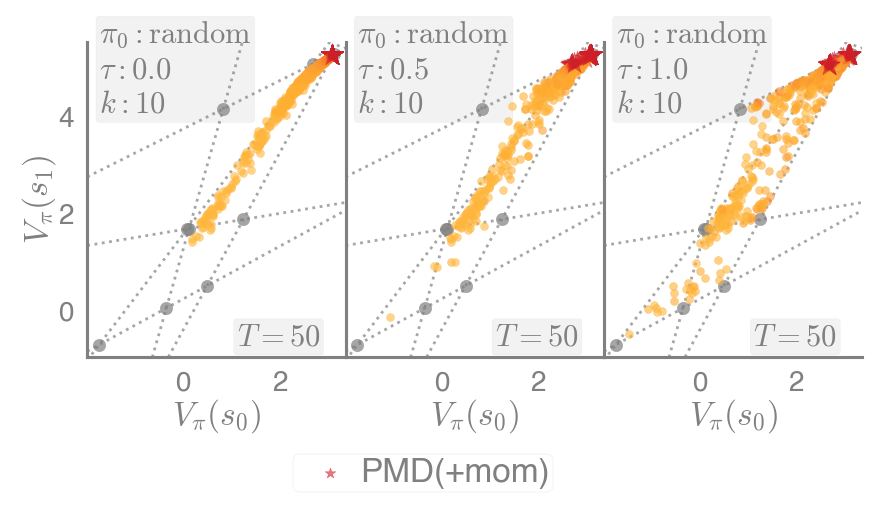

In [5]:
import src.plot_tiny_mdps
src.plot_tiny_mdps = importlib.reload(src.plot_tiny_mdps)
from src.plot_tiny_mdps import compare_inexact
import colormaps as cmaps

mdp_no = 0
labels_rows1 = []
labels_rows2 = []
labels_rows3 = []
data_rows1 = []
data_rows2 = []
data_rows3 = []

i = 0
kk = 0
k = k_list[0]
tau_label = r'\tau'
labels = []
datas = []
batch_param_kv_rows = []

newcmap1 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap3 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")

cmaps = [newcmap3,newcmap3,newcmap3,newcmap3,newcmap3]
Ts = []
for tau_ind, tau in enumerate(tau_list):
    Ts.append(T)
    labels.append(f"PMD(+mom)" if tau_ind == 0 else None)
    datas.append(lazy_momentum[tau_ind][kk][2][mdp_no][i])
    batch_param_kv_rows.append(f"$\pi_0:{initial_policy_labels_list[i]}$\n${tau_label}:{tau}$\n$k:{k}$")


compare_inexact(mdp, datas=[datas], labels=[labels], Ns=[Ts], supress_policy_annotation=True,
                plot_lines=False, s=100, alpha=0.6, batch_param_kv_rows=[batch_param_kv_rows],
                text_pos=[3,4],
                legend_bbox=(0.3, -0.3),
                labelsize=12, textsize=11,
                legendsize=12,
                ticklabelsize=10,
                savefig=True, cmaps=[cmaps], plot_colormaps=False,
                figname=f"how__mdp{mdp_eg_no}__seeds_polytope_mom_k{k}")